In [1]:
import xarray as xr
url = "https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41"
ds = xr.open_dataset(url)

In [2]:
print(ds)

<xarray.Dataset> Size: 151TB
Dimensions:           (time: 8309, latitude: 17999, longitude: 36000)
Coordinates:
  * time              (time) datetime64[ns] 66kB 2002-06-01T09:00:00 ... 2025...
  * latitude          (latitude) float32 72kB -89.99 -89.98 ... 89.98 89.99
  * longitude         (longitude) float32 144kB -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 43TB ...
    analysis_error    (time, latitude, longitude) float64 43TB ...
    mask              (time, latitude, longitude) float32 22TB ...
    sea_ice_fraction  (time, latitude, longitude) float64 43TB ...
Attributes: (12/51)
    _NCProperties:              version=2,netcdf=4.7.4,hdf5=1.8.12
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              g

In [3]:
dc = ds['analysed_sst'].sel(latitude=slice(33.5, 35.5), longitude=slice(-75.5, -73.5))

In [4]:
import dask
dc = dc.chunk({'time': 500, 'latitude': 50, 'longitude': 50})  # Ensure it remains chunked

# Resample with Dask lazy computation


In [8]:
dc_monthly = dc.resample(time='ME').mean()
dc_one_month = dc_monthly.sel(time="2010-01")
dc_monthly

<xarray.DataArray 'analysed_sst' (time: 274, latitude: 201, longitude: 201)> Size: 89MB
dask.array<transpose, shape=(274, 201, 201), dtype=float64, chunksize=(32, 50, 50), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 804B 33.5 33.51 33.52 ... 35.48 35.49 35.5
  * longitude  (longitude) float32 804B -75.5 -75.49 -75.48 ... -73.51 -73.5
  * time       (time) datetime64[ns] 2kB 2002-06-30 2002-07-31 ... 2025-03-31
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          Interim near-real-time (nrt) version using Multi-Resolu...
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    source:           MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO,...
    standard_name:    sea_surface_foundation_temperature
    units:            degree_C
    valid_max:        57.767
    valid_min:        -7.767000000000003

In [ ]:
%%time
dc_one_month.mean(dim=['latitude', 'longitude']).compute()

In [ ]:
dc_one_month = dc_monthly.sel(time="2010-01")
dc_mean = dc_one_month.mean(dim=['latitude', 'longitude']).compute()
dc_mean



In [4]:
dc_monthly

<xarray.DataArray 'analysed_sst' (time: 273, latitude: 201, longitude: 201)> Size: 88MB
dask.array<transpose, shape=(273, 201, 201), dtype=float64, chunksize=(32, 50, 50), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 804B 33.5 33.51 33.52 ... 35.48 35.49 35.5
  * longitude  (longitude) float32 804B -75.5 -75.49 -75.48 ... -73.51 -73.5
  * time       (time) datetime64[ns] 2kB 2002-06-01 2002-07-01 ... 2025-02-01
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          Interim near-real-time (nrt) version using Multi-Resolu...
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    source:           MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO,...
    standard_name:    sea_surface_foundation_temperature
    units:            degree_C
    valid_max:        57.767
    valid_min:        -7.767000000000003

In [ ]:
%%time
# Compute mean over latitude/longitude before converting
dc_mean = dc_monthly.mean(dim=['latitude', 'longitude']).compute()

In [ ]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    dc_mean = dc_monthly.mean(dim=['latitude', 'longitude']).compute()

[                                        ] | 1% Completed | 171.49 ss

In [ ]:

# Now convert and plot
dc_mean.to_pandas().plot()
plt.show()


In [ ]:
dc_monthly.mean(dim=['latitude', 'longitude']).to_pandas().plot();

In [ ]:
# Compute explicitly when needed
dc_monthly = dc_monthly.compute()  # If you need to finalize the result


In [1]:
from erddapy import ERDDAP
e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap",
    protocol="griddap",
)
e.dataset_id = "jplMURSST41"
ds = e.to_xarray()

HTTPError: Error {
    code=413;
    message="Payload Too Large: Your query produced too much data.  Try to request less data. [memory]  128301168 MB is more than the .nc 2 GB limit.";
}


<xarray.Dataset> Size: 151TB
Dimensions:           (time: 8307, latitude: 17999, longitude: 36000)
Coordinates:
  * time              (time) datetime64[ns] 66kB 2002-06-01T09:00:00 ... 2025...
  * latitude          (latitude) float32 72kB -89.99 -89.98 ... 89.98 89.99
  * longitude         (longitude) float32 144kB -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 43TB ...
    analysis_error    (time, latitude, longitude) float64 43TB ...
    mask              (time, latitude, longitude) float32 22TB ...
    sea_ice_fraction  (time, latitude, longitude) float64 43TB ...
Attributes: (12/51)
    _NCProperties:              version=2,netcdf=4.7.4,hdf5=1.8.12
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              g

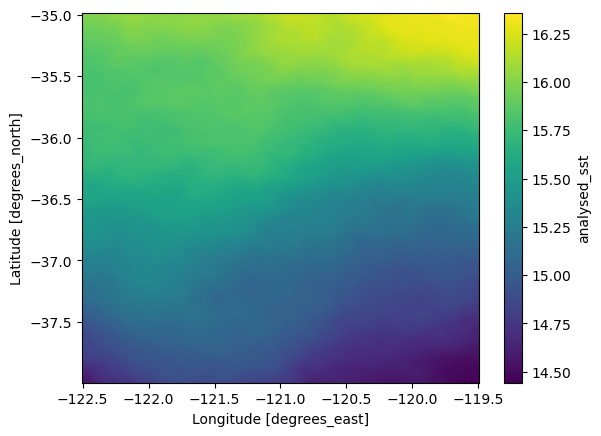

In [1]:
import xarray as xr

url = "https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41"
ds = xr.open_dataset(url)
print(ds)
dc = ds['analysed_sst'].sel(
                        latitude=slice(-37.99, -34.99), 
                        longitude=slice(-122.5, -119.5), 
                        time=slice('2002-01-01', '2002-12-31'))
print(dc)

mean = dc.mean()  #738MB/ 1899MB (before running this it was ~400MB memo used)
print(mean)

dc.mean(dim=['latitude', 'longitude'])
dc.mean(dim=['time']).plot()

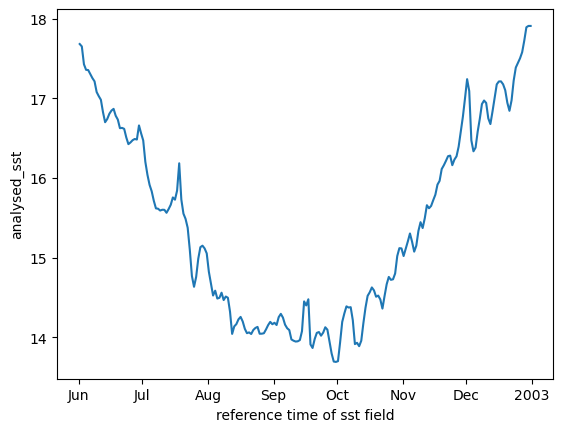

In [3]:
dc.mean(dim=['latitude', 'longitude']).plot()

In [1]:
import xarray as xr

url = "https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41"
ds = xr.open_dataset(url)
dc = ds['analysed_sst'].sel(
                        latitude=slice(-37.99, -34.99), 
                        longitude=slice(-122.5, -119.5), 
                        time=slice('2003-01-01', '2003-12-31'))

In [2]:
import dask
dc = dc.chunk({'time': -1, 'latitude': 50, 'longitude': 50})  # Ensure it remains chunked

In [3]:
from dask.distributed import Client

client = Client(dashboard_address=":8899")  # Change to any available port
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8899/status,
Dashboard: http://127.0.0.1:8899/status,Workers: 4
Total threads: 4,Total memory: 1.85 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33849,Workers: 4
Dashboard: http://127.0.0.1:8899/status,Total threads: 4
Started: Just now,Total memory: 1.85 GiB
Comm: tcp://127.0.0.1:35269,Total threads: 1
Dashboard: http://127.0.0.1:39991/status,Memory: 474.75 MiB
Nanny: tcp://127.0.0.1:42899,


In [ ]:
%%time
dc_mean = dc.mean(dim=['latitude', 'longitude']).compute()

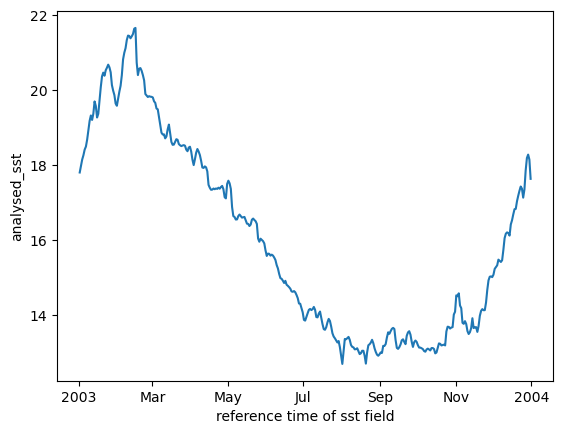

In [7]:
dc_mean.plot()

In [14]:
%%time
dc.isel(time=slice(0,1)).mean(dim=['latitude', 'longitude'])

CPU times: user 8.51 ms, sys: 5.2 ms, total: 13.7 ms
Wall time: 612 ms


<xarray.DataArray 'analysed_sst' (time: 1)> Size: 8B
array([17.68239177])
Coordinates:
  * time     (time) datetime64[ns] 8B 2002-06-01T09:00:00

In [17]:
%%time
dc.isel(time=slice(0,101)).mean(dim=['latitude', 'longitude'])

CPU times: user 704 ms, sys: 200 ms, total: 904 ms
Wall time: 21.6 s


<xarray.DataArray 'analysed_sst' (time: 101)> Size: 808B
array([17.68239177, 17.65205698, 17.42795117, 17.35859971, 17.35557652,
       17.30397063, 17.25439463, 17.21387798, 17.07969612, 17.02785009,
       16.98250892, 16.82617434, 16.70076668, 16.74087835, 16.80656006,
       16.84701081, 16.86830618, 16.78209559, 16.73386654, 16.62595825,
       16.62941572, 16.61769446, 16.50935697, 16.42564089, 16.44723482,
       16.4752216 , 16.49036981, 16.4832666 , 16.66048885, 16.56099804,
       16.47185112, 16.20334063, 16.03982808, 15.91436474, 15.83389242,
       15.71467536, 15.61934613, 15.61490924, 15.59205686, 15.60181528,
       15.60111937, 15.56382465, 15.610601  , 15.66422289, 15.75650469,
       15.72821324, 15.8429399 , 16.18521092, 15.73049302, 15.55300795,
       15.48723956, 15.37579203, 15.10021107, 14.77015102, 14.63457105,
       14.75812838, 14.98714799, 15.13222896, 15.15081254, 15.11646546,
       15.05412748, 14.8238566 , 14.6706374 , 14.52517478, 14.58587587,
       14.48713001, 14.49637659, 14.56050951, 14.46826665, 14.51247324,
       14.49718522, 14.32206422, 14.04310472, 14.1374156 , 14.16621883,
       14.22622649, 14.25667584, 14.19922014, 14.10696748, 14.05251879,
       14.06212404, 14.04185816, 14.09248185, 14.11806067, 14.13131394,
       14.04536419, 14.04601728, 14.0515624 , 14.09927964, 14.15368965,
       14.19440194, 14.16476757, 14.18299891, 14.15486561, 14.25380548,
       14.29502749, 14.24799966, 14.15911841, 14.11450218, 14.09129411,
       13.97390767])
Coordinates:
  * time     (time) datetime64[ns] 808B 2002-06-01T09:00:00 ... 2002-09-09T09...

In [2]:
import dask
dc = dc.chunk({'time': -1, 'latitude': 50, 'longitude': 50})  # Ensure it remains chunked


In [ ]:
%%time
dc.mean(dim=['latitude', 'longitude']).plot()